In [1]:
import pandas as pd 
import numpy as np

from env import username, password, get_db_url
import os

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

# Exercises II

### 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [2]:
def new_zillow_data():
    """
    This function will:
    - create a connect_url to mySQL
    - return a df of the given query from the zillow db
    """
    url = get_db_url('zillow')
    SQL_query = '''
                select bedroomcnt as bedrooms, bathroomcnt as bathrooms, calculatedfinishedsquarefeet as sqft
                    , taxvaluedollarcnt as tax_value, yearbuilt as year_built, taxamount as tax_amount, fips
                from propertylandusetype
                join properties_2017 on propertylandusetype.propertylandusetypeid = properties_2017.propertylandusetypeid
                    and properties_2017.propertylandusetypeid = 261
                '''
    return pd.read_sql(SQL_query, url)

In [3]:
def get_zillow_data(filename="zillow.csv"):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - If csv doesn't exists:
        - create a df of the SQL_query
        - write df to csv
    - Output zillow df
    """
    if os.path.exists(filename):
        df = pd.read_csv(filename, index_col=0) 
        print('Found CSV')
        return df
    
    else:
        df = new_zillow_data()
        
        #want to save to csv
        df.to_csv(filename)
        print('Creating CSV')
        return df

In [2]:
df = wrangle.get_zillow_data()

Found CSV


### 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [3]:
df.shape

(2152863, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 131.4 MB


In [5]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [6]:
df.isnull().sum()

bedrooms        11
bathrooms       11
sqft          8484
tax_value      493
year_built    9337
tax_amount    4442
fips             0
dtype: int64

Takeaways:
- everything is float
- target variable: tax_value
- fips is a county code and serves as a categorical variable

#### Change column name

In [7]:
# changed column names in SQL
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [8]:
df = df.rename(columns={'fips': 'county'})

### Handle Nulls

In [9]:
df = df.dropna()

### Check data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   county      float64
dtypes: float64(7)
memory usage: 130.6 MB


In [11]:
make_ints = ['bedrooms', 'sqft', 'tax_value', 'year_built']

for col in make_ints:
    df[col] = df[col].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    int64  
 1   bathrooms   float64
 2   sqft        int64  
 3   tax_value   int64  
 4   year_built  int64  
 5   tax_amount  float64
 6   county      float64
dtypes: float64(3), int64(4)
memory usage: 130.6 MB


In [13]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,6037.0
6,3,4.0,1620,847770,2011,10244.94,6037.0
7,3,2.0,2077,646760,1926,7924.68,6037.0
11,0,0.0,1200,5328,1972,91.60,6037.0
14,0,0.0,171,6920,1973,255.17,6037.0


6037 - la  
6059 - orange  
6111 - ventura  

In [14]:
df.county = df.county.map({6037:'LA', 6059:'orange', 6111:'ventura'})

In [15]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


### visualize

In [16]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


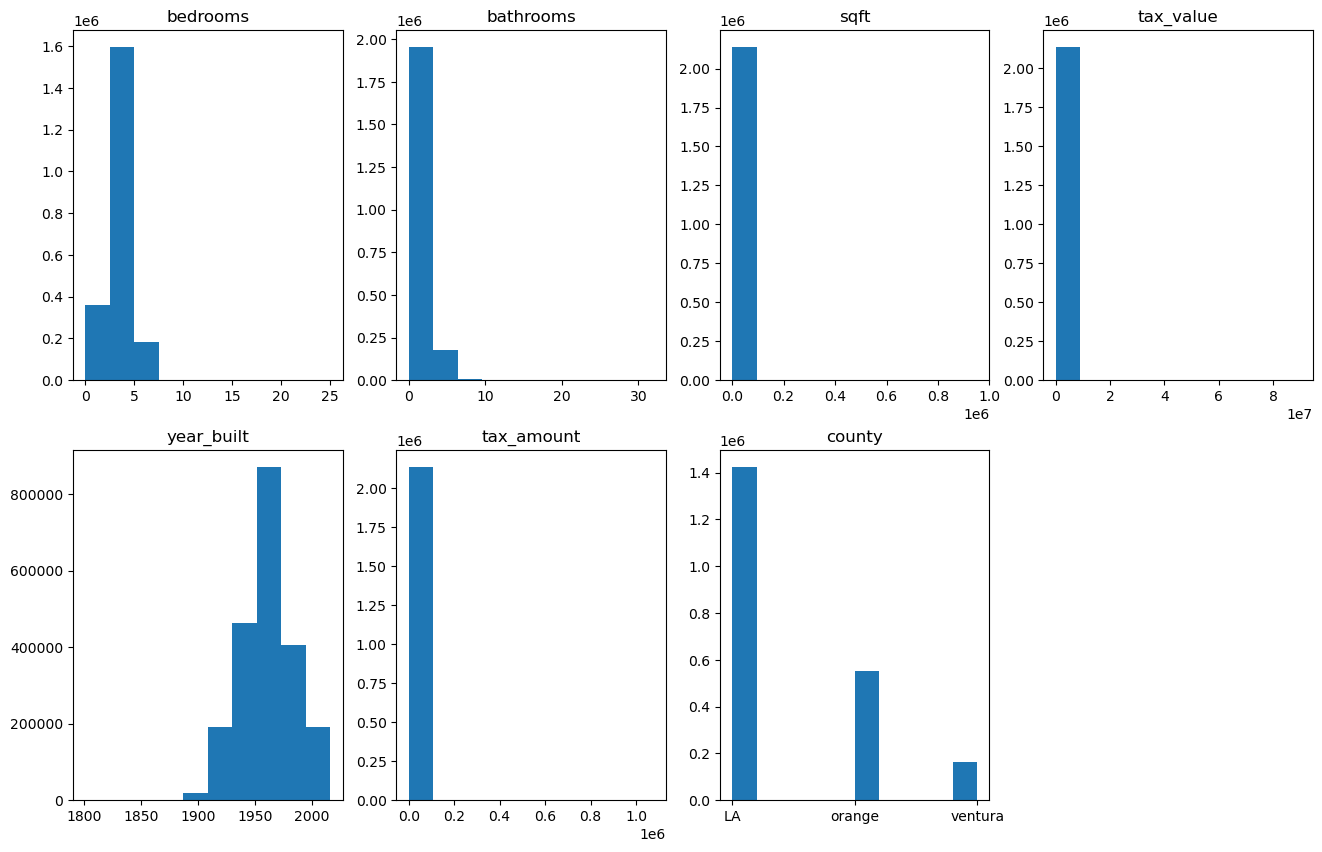

In [17]:
plt.figure(figsize=(16,10))

for i, col in enumerate(df.columns):
    
    plot_number = i + 1
    plt.subplot(2,4, plot_number)
    plt.title(col)
    plt.hist(df[col])
plt.show()

bedrooms


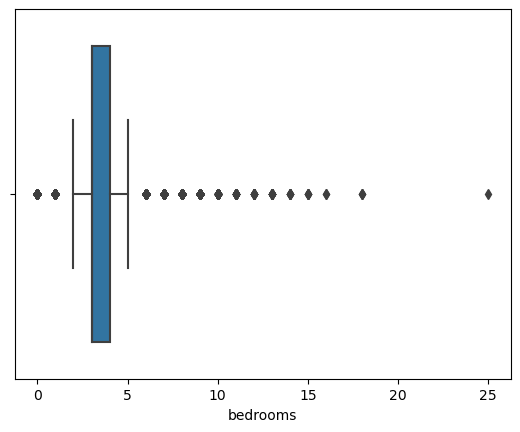

0       4397
1      22895
2     334221
3     962944
4     633608
5     150671
6      25117
7       4792
8       1103
9        290
10       118
11        34
12        12
13        15
14         7
15         5
16         2
18         3
25         1
Name: bedrooms, dtype: int64

bathrooms


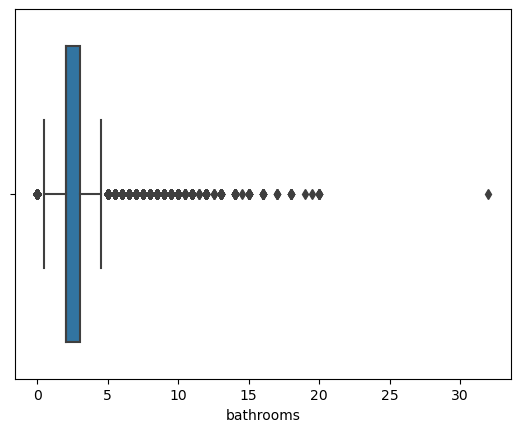

0.00       4274
0.50         16
1.00     412582
1.50      31157
1.75          3
2.00     942463
2.50     142827
3.00     422398
3.50      28464
4.00      82039
4.50      19474
5.00      28306
5.50       6201
6.00      10717
6.50       1330
7.00       4381
7.50        382
8.00       1681
8.50        108
9.00        707
9.50         50
10.00       322
10.50        14
11.00       145
11.50         3
12.00        73
12.50         3
13.00        39
14.00        25
14.50         1
15.00        17
16.00        12
17.00         4
18.00         8
19.00         1
19.50         1
20.00         6
32.00         1
Name: bathrooms, dtype: int64

sqft


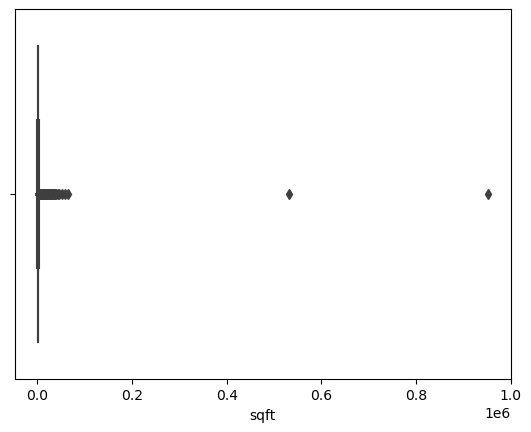

1         6
2         2
3         7
7         1
10        2
         ..
52503     1
59220     1
63692     1
531118    1
952576    1
Name: sqft, Length: 10557, dtype: int64

tax_value


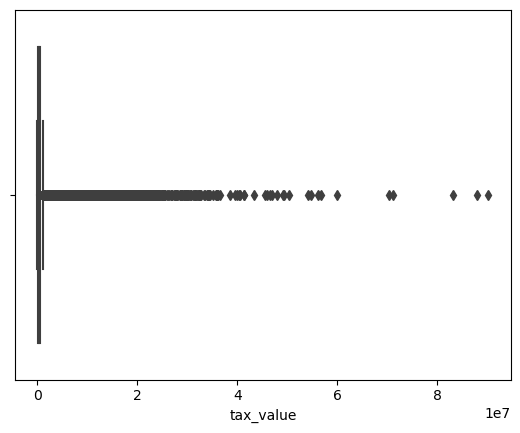

22          10
23           6
31           1
46           1
101          1
            ..
70416358     1
71067500     1
83196095     1
88020448     1
90188462     1
Name: tax_value, Length: 588178, dtype: int64

year_built


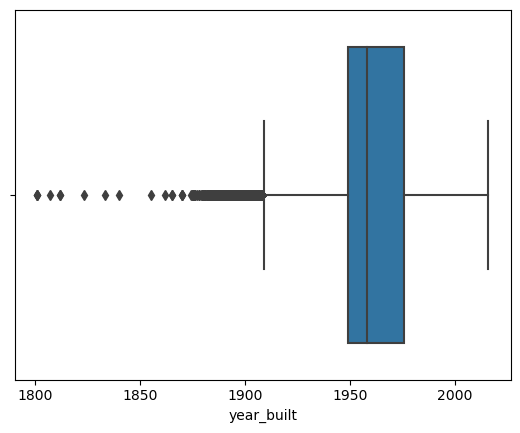

1801       3
1807       1
1812       2
1823       1
1833       1
        ... 
2012    3431
2013    4768
2014    4706
2015    3551
2016      97
Name: year_built, Length: 153, dtype: int64

tax_amount


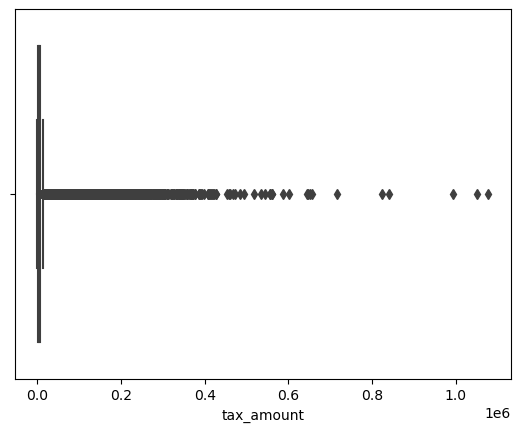

6.34          1
13.36         4
13.44         1
13.47         4
13.48         1
             ..
824166.91     1
841059.04     1
994030.96     1
1052070.50    1
1078101.87    1
Name: tax_amount, Length: 915868, dtype: int64



In [18]:
for col in df.columns[:-1]:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show()
    
    print(df[col].value_counts().sort_index())
    print()

### outliers

In [19]:
df.sqft.value_counts().sort_index()

1         6
2         2
3         7
7         1
10        2
         ..
52503     1
59220     1
63692     1
531118    1
952576    1
Name: sqft, Length: 10557, dtype: int64

In [20]:
df.sqft.mean()

1863.1939702883094

In [21]:
df = df[df.sqft < 25_000]

In [22]:
df.shape

(2140189, 7)

In [23]:
df.tax_value.quantile(.95)

1203000.0

In [24]:
df = df [df.tax_value < df.tax_value.quantile(.95)]

In [25]:
df.shape

(2033172, 7)

bedrooms


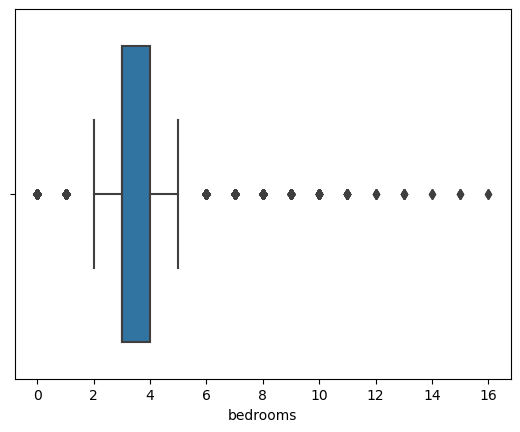

0       4208
1      22430
2     328193
3     938561
4     595894
5     122659
6      17628
7       2843
8        536
9        136
10        52
11        16
12         4
13         5
14         2
15         3
16         2
Name: bedrooms, dtype: int64

bathrooms


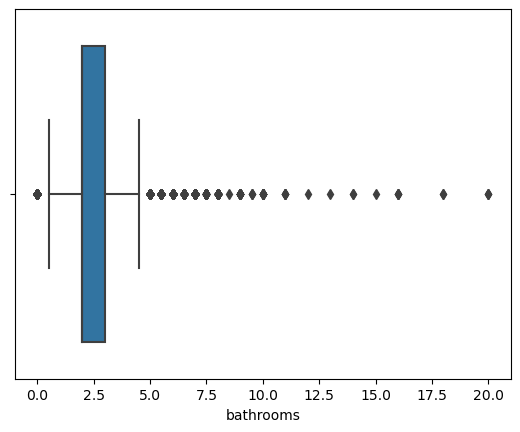

0.00       4096
0.50         13
1.00     410357
1.50      31011
1.75          3
2.00     931475
2.50     140062
3.00     400774
3.50      22501
4.00      62953
4.50      10614
5.00      14220
5.50       1228
6.00       2830
6.50        150
7.00        618
7.50         66
8.00        134
8.50          1
9.00         29
9.50          3
10.00        15
11.00         5
12.00         1
13.00         1
14.00         2
15.00         1
16.00         4
18.00         2
20.00         3
Name: bathrooms, dtype: int64

sqft


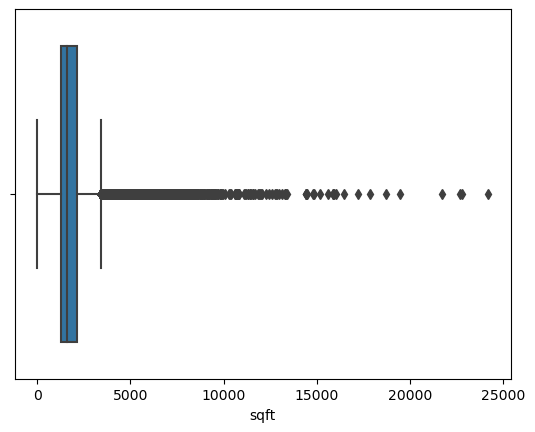

1        6
2        1
3        6
10       2
12       1
        ..
19460    1
21734    1
22702    1
22800    1
24220    1
Name: sqft, Length: 6639, dtype: int64

tax_value


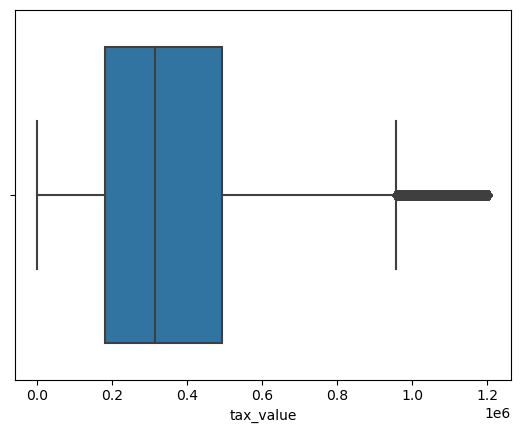

22         10
23          6
31          1
46          1
101         1
           ..
1202886     1
1202942     1
1202959     1
1202988     1
1202999     1
Name: tax_value, Length: 523005, dtype: int64

year_built


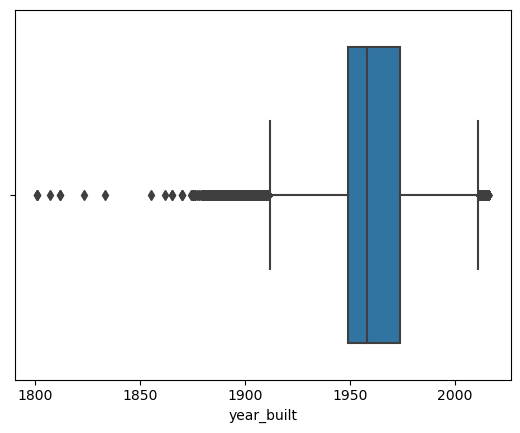

1801       3
1807       1
1812       2
1823       1
1833       1
        ... 
2012    2386
2013    3210
2014    3319
2015    2638
2016      74
Name: year_built, Length: 152, dtype: int64

tax_amount


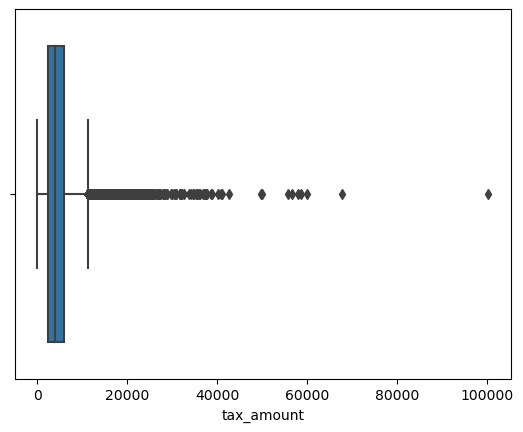

6.34         1
13.36        4
13.44        1
13.47        4
13.48        1
            ..
57963.32     1
58634.77     1
60110.79     1
67715.45     1
100379.34    1
Name: tax_amount, Length: 814643, dtype: int64



In [26]:
for col in df.columns[:-1]:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show()
    
    print(df[col].value_counts().sort_index())
    print()

### 3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [ ]:
def new_zillow_data():
    """
    This function will:
    - create a connect_url to mySQL
    - return a df of the given query from the zillow db
    """
    url = get_db_url('zillow')
    SQL_query = '''
                select bedroomcnt as bedrooms, bathroomcnt as bathrooms, calculatedfinishedsquarefeet as sqft
                    , taxvaluedollarcnt as tax_value, yearbuilt as year_built, taxamount as tax_amount, fips
                from propertylandusetype
                join properties_2017 on propertylandusetype.propertylandusetypeid = properties_2017.propertylandusetypeid
                    and properties_2017.propertylandusetypeid = 261
                '''
    return pd.read_sql(SQL_query, url)

In [ ]:
def get_zillow_data(filename="zillow.csv"):
    """
    This function will:
    - Check local directory for csv file
        - return if exists
    - If csv doesn't exists:
        - create a df of the SQL_query
        - write df to csv
    - Output zillow df
    """
    if os.path.exists(filename):
        df = pd.read_csv(filename, index_col=0) 
        print('Found CSV')
        return df
    
    else:
        df = new_zillow_data()
        
        #want to save to csv
        df.to_csv(filename)
        print('Creating CSV')
        return df

In [ ]:
def wrangle_zillow(df):
    df = df.rename(columns={'fips': 'county'})
    
    df = df.dropna()
    
    make_ints = ['bedrooms', 'sqft', 'tax_value', 'year_built']

    for col in make_ints:
        df[col] = df[col].astype(int)
        
    df.county = df.county.map({6037:'la', 6059:'orange', 6111:'ventura'})
    
    df = df[df.bedrooms.between(1,7)]
    df = df[df.bathrooms.between(1,6)]
    df = df[df.sqft <= df.sqft.mean() + (4 * df.sqft.std())]
    df = df[df.sqft >= 500]
    df = df [df.tax_value < df.tax_value.quantile(.95)]
    
    return df

In [ ]:
rmv_zillow_outliers(df, a=1, b=7, c=1, d=6, e=4, f=0.95)

In [19]:
fresh_df = wrangle.wrangle_zillow(df)

### Bedrooms

In [102]:
df.bedrooms.value_counts(dropna=False).sort_index()

0       4208
1      22430
2     328193
3     938561
4     595894
5     122659
6      17628
7       2843
8        536
9        136
10        52
11        16
12         4
13         5
14         2
15         3
16         2
Name: bedrooms, dtype: int64

In [46]:
df.bedrooms.mean()

3.25770028310443

In [45]:
df.bedrooms.std()

0.8967887375772372

In [47]:
df.bedrooms.mean() + (3 * df.bedrooms.std())

5.948066495836141

In [48]:
df.bedrooms.mean() - (3 * df.bedrooms.std())

0.5673340703727185

- Will use bedrooms between 1 and 7

In [169]:
df[df.bedrooms.between(1,7)]

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
18,3,1.0,1244,169471,1950,2532.88,LA
19,3,2.0,1300,233266,1950,3110.99,LA
...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA
2152858,4,3.0,2262,960756,2015,13494.52,orange
2152859,4,4.5,3127,536061,2014,6244.16,orange
2152861,3,2.5,1974,424353,2015,5302.70,orange


In [95]:
df[df.bedrooms.between(1,10)]

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
18,3,1.0,1244,169471,1950,2532.88,LA
19,3,2.0,1300,233266,1950,3110.99,LA
...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA
2152858,4,3.0,2262,960756,2015,13494.52,orange
2152859,4,4.5,3127,536061,2014,6244.16,orange
2152861,3,2.5,1974,424353,2015,5302.70,orange


**Bathrooms**

In [173]:
df.bathrooms.value_counts().sort_index()

0.00       4096
0.50         13
1.00     410357
1.50      31011
1.75          3
2.00     931475
2.50     140062
3.00     400774
3.50      22501
4.00      62953
4.50      10614
5.00      14220
5.50       1228
6.00       2830
6.50        150
7.00        618
7.50         66
8.00        134
8.50          1
9.00         29
9.50          3
10.00        15
11.00         5
12.00         1
13.00         1
14.00         2
15.00         1
16.00         4
18.00         2
20.00         3
Name: bathrooms, dtype: int64

In [172]:
df[df.bathrooms.between(1,6)]

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
18,3,1.0,1244,169471,1950,2532.88,LA
19,3,2.0,1300,233266,1950,3110.99,LA
...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA
2152858,4,3.0,2262,960756,2015,13494.52,orange
2152859,4,4.5,3127,536061,2014,6244.16,orange
2152861,3,2.5,1974,424353,2015,5302.70,orange


In [96]:
df[df.bathrooms.between(10,20)]

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
79946,7,10.0,7248,971493,1927,11488.14,LA
122314,6,10.0,7405,522097,1969,8459.10,LA
240975,9,11.0,8112,710387,1929,9135.16,LA
250867,12,12.0,7636,1102738,1988,13420.04,LA
253517,5,18.0,56,223854,1960,3268.16,LA
302713,10,10.0,7472,463884,1939,6141.07,LA
387443,3,13.0,2472,477475,1937,8399.94,LA
433636,3,14.0,1028,817420,1939,9843.88,LA
701366,0,20.0,1650,152598,1947,1892.01,LA
717487,9,10.0,5131,1138500,1962,13787.64,LA


In [119]:
df.sqft.mean()

1751.420816832024

In [120]:
df.sqft.std()

725.8099250417995

In [122]:
df.sqft.mean() - (2 * df.sqft.std())

299.800966748425

- Will use 500 sqft as my min.  
    - On zillow.com, 500sqft is the min available filter

In [158]:
df[df.sqft >= 500]

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
18,3,1.0,1244,169471,1950,2532.88,LA
...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA
2152858,4,3.0,2262,960756,2015,13494.52,orange
2152859,4,4.5,3127,536061,2014,6244.16,orange
2152861,3,2.5,1974,424353,2015,5302.70,orange


In [166]:
df.sqft.mean() + (4 * df.sqft.std())

4654.660516999222

- Will use 4 standard deviations above the mean.
    - 3 standard deviations cuts out 25K+ rows

In [154]:
df[df.sqft <= df.sqft.mean() + (4 * df.sqft.std())]

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA
...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA
2152858,4,3.0,2262,960756,2015,13494.52,orange
2152859,4,4.5,3127,536061,2014,6244.16,orange
2152861,3,2.5,1974,424353,2015,5302.70,orange


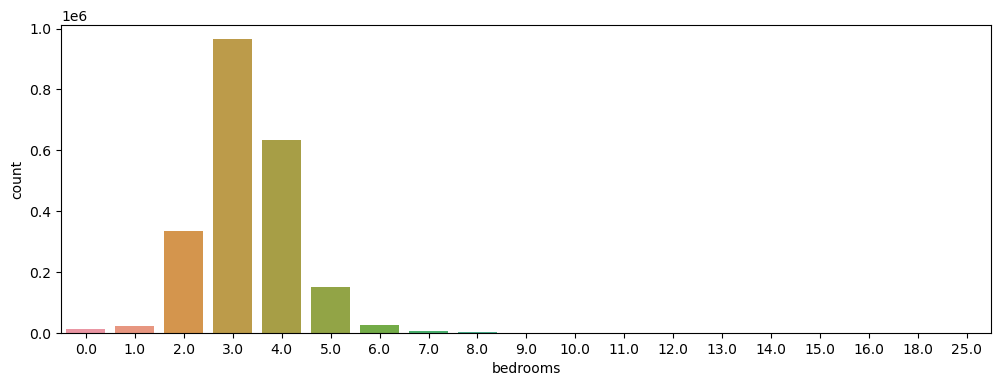

In [42]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='bedrooms')
plt.show()

**Takeaways:**
- 11 nulls , will drop
- 0.3% of data is 7+ bedrooms, considering dropping (6418 rows)
- 2, 3, & 4 bedrooms are most common
- keeping all bedrooms with 10k+ volume counts

- dropping null for bedrooms drops all nulls for bathrooms as well

#### Bathrooms

In [35]:
df.bathrooms.value_counts(dropna=False).sort_index()

0.00       4096
0.50         13
1.00     410357
1.50      31011
1.75          3
2.00     931475
2.50     140062
3.00     400774
3.50      22501
4.00      62953
4.50      10614
5.00      14220
5.50       1228
6.00       2830
6.50        150
7.00        618
7.50         66
8.00        134
8.50          1
9.00         29
9.50          3
10.00        15
11.00         5
12.00         1
13.00         1
14.00         2
15.00         1
16.00         4
18.00         2
20.00         3
Name: bathrooms, dtype: int64

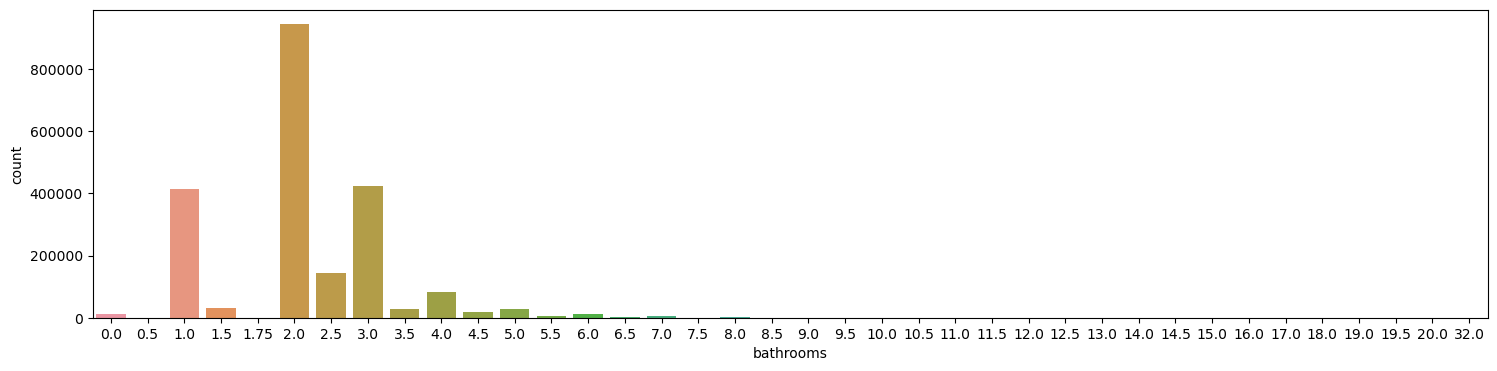

In [54]:
plt.figure(figsize=(18,4))
sns.countplot(data=df, x='bathrooms')
plt.show()

**Takeaway:**
- 11 nulls, will drop
- I won't drop bathrooms for now
- My hypothesis is that the number of bathrooms is dependent on the number of bedrooms

#### Square feet

In [64]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [36]:
df.sqft.describe()

count    2.033172e+06
mean     1.751421e+03
std      7.258099e+02
min      1.000000e+00
25%      1.242000e+03
50%      1.587000e+03
75%      2.106000e+03
max      2.422000e+04
Name: sqft, dtype: float64

In [42]:
df.sqft.mean()

1751.420816832024

In [39]:
df.sqft.std()

725.8099250417995

In [40]:
df.sqft.mean() - df.sqft.std()

1025.6108917902245

In [41]:
df.sqft.mean() + (2 * df.sqft.std())

3203.0406669156228

In [44]:
df[df.sqft <= df.sqft.mean() + (3 * df.sqft.std())]

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA
...,...,...,...,...,...,...,...
2152855,3,2.5,1809,405547,2012,4181.10,orange
2152858,4,3.0,2262,960756,2015,13494.52,orange
2152859,4,4.5,3127,536061,2014,6244.16,orange
2152861,3,2.5,1974,424353,2015,5302.70,orange


In [119]:
df[df.sqft.isnull()].bedrooms.value_counts()

0.0    8261
2.0     102
3.0      51
1.0      38
4.0      13
5.0       9
6.0       3
Name: bedrooms, dtype: int64

In [120]:
df[df.sqft.isnull()].bathrooms.value_counts()

0.0    8260
1.0     135
2.0      44
3.0      16
4.0       6
1.5       5
5.0       3
6.0       3
3.5       2
7.0       1
2.5       1
4.5       1
Name: bathrooms, dtype: int64

In [158]:
new_df = new_df.dropna(subset=['sqft'])

In [159]:
new_df.isnull().sum()

bedrooms         0
bathrooms        0
sqft             0
tax_value      115
year_built    1459
tax_amount    2683
fips             0
dtype: int64

In [161]:
new_df.shape

(2144375, 7)

In [167]:
df.shape[0] - new_df.shape[0]

8488

#### Year built

In [105]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [112]:
df.isnull().sum()

bedrooms        11
bathrooms       11
sqft          8484
tax_value      493
year_built    9337
tax_amount    4442
fips             0
dtype: int64

In [113]:
df.isnull().sum().sum()

22778

In [168]:
new_df = new_df.dropna(subset=['year_built'])

In [169]:
df.shape[0] - new_df.shape[0]

9947

In [170]:
new_df.isnull().sum()

bedrooms         0
bathrooms        0
sqft             0
tax_value      113
year_built       0
tax_amount    2663
fips             0
dtype: int64

In [171]:
new_df = new_df.dropna(subset=['tax_amount'])

In [172]:
new_df.isnull().sum()

bedrooms       0
bathrooms      0
sqft           0
tax_value     18
year_built     0
tax_amount     0
fips           0
dtype: int64

In [173]:
new_df = new_df.dropna(subset=['tax_value'])

In [174]:
new_df.isnull().sum()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

In [176]:
df.shape[0] - new_df.shape[0]

12628

In [196]:
print(f'Percentage of data dropped due to nulls: {(df.shape[0] - new_df.shape[0]) / df.shape[0]:.2%}')

Percentage of data dropped due to nulls: 0.59%


### Drop all nulls

In [197]:
new_df2 = df.dropna()